**Lab 11: Locally Weighted Regression<br>
Shikha N<br>
1BM18CS149**

Fitting to Give n Ploynomial Of degree 1 

In [1]:
from math import ceil
import numpy as np
from scipy import linalg

def lowess(x, y, f=2. / 3., iter=3):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest


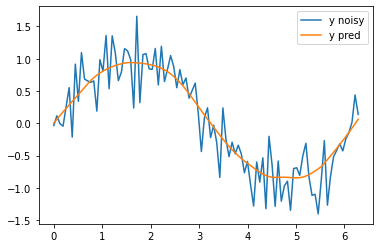

In [2]:
if __name__ == '__main__':
    import math
    n = 100
    x = np.linspace(0, 2 * math.pi, n)
    y = np.sin(x) + 0.3 * np.random.randn(n)

    f = 0.25
    yest = lowess(x, y, f=f, iter=3)

    import pylab as pl
    pl.clf()
    pl.plot(x, y, label='y noisy')
    pl.plot(x, yest, label='y pred')
    pl.legend()
    pl.show()

Using tips data set

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# kernel smoothing function
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    
    return weights

# function to return local weight of eah traiining example
def localWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W
    
# root function that drives the algorithm
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return ypred


(244, 2)


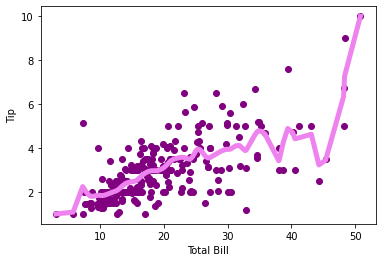

In [5]:
data = pd.read_csv('tips.csv')

bill= np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
m = np.shape(mtip)[1]
one = np.ones((1, m), dtype = int)

# horizontal stacking
X = np.hstack((one.T, mbill.T))
print(X.shape)

# predicting values using LWLR
ypred = localWeightRegression(X, mtip, 0.8)

# plotting the predicted graph
xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(bill, tip, color='purple')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='violet', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()